In [2]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

#### Goal:

Cross-validate regression model found in 4.4, apply it to new dataset(s) and determine if good. Use folds/holdouts as necessary.

In [3]:
dfload = pd.read_csv('C:/Users/jafon\Documents/PythonMaterials/Data/NYC Crime Statistics 2014.csv')

In [4]:
dfload.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,851",0,0.000,NaN,0.000,0,0,11,1,10,0,0.000
1,Addison Town and Village,"2,568",2,0.000,NaN,0.000,1,1,49,1,47,1,0.000
2,Afton Village4,820,0,0.000,0,nan,0,0,1,0,1,0,0.000
3,Akron Village,"2,842",1,0.000,NaN,0.000,0,1,17,0,17,0,0.000
4,Albany4,"98,595",802,8.000,54,nan,237,503,"3,888",683,"3,083",122,12.000


In [5]:
dfload = dfload.drop(['Rape\n(revised\ndefinition)1'], axis=1)

In [6]:
df = dfload.drop(['Burglary'], axis=1)

In [7]:
df.columns=('City', 'Population', 'Violent Crime', 'Murder', 'Rape', 
               'Robbery', 'Assault', 'Property Crime', 'Larceny', 'MV Theft',
           'Arson')

In [8]:
df.head()

,City,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property Crime,Larceny,MV Theft,Arson
0,Adams Village,"1,851",0,0.000,0.000,0,0,11,10,0,0.000
1,Addison Town and Village,"2,568",2,0.000,0.000,1,1,49,47,1,0.000
2,Afton Village4,820,0,0.000,nan,0,0,1,1,0,0.000
3,Akron Village,"2,842",1,0.000,0.000,0,1,17,17,0,0.000
4,Albany4,"98,595",802,8.000,nan,237,503,"3,888","3,083",122,12.000


In [9]:
# checking what I need to change and what i don't

print(type(df.Robbery[16]))
print(type(df.Rape[16]))
print(type(df.Murder[16]))
print(type(df.Assault[16]))
print(type(df['Property Crime'][16]))
print(type(df.Larceny[16]))
print(type(df['MV Theft'][16]))

<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [10]:
# fixing the data types

df['Robbery'] = df['Robbery'].str.replace(',','')
df['Robbery'] = [float(i) for i in df.Robbery]

In [11]:
df['MV Theft'] = df['MV Theft'].str.replace(',','')
df['MV Theft'] = [float(i) for i in df['MV Theft']]

df['Assault'] = df['Assault'].str.replace(',','')
df['Assault'] = [float(i) for i in df.Assault]

df['Property Crime'] = df['Property Crime'].str.replace(',','')
df['Property Crime'] = [float(i) for i in df['Property Crime']]

df['Larceny'] = df['Larceny'].str.replace(',','')
df['Larceny'] = [float(i) for i in df.Larceny]

In [12]:
# setting up the previous model to this model

df['TotalCrime'] = (df['Robbery'] + df['Murder'] + 
                       df['Assault'] + df['Larceny'] + df['MV Theft'])
df['Property Crime5'] = df['Property Crime'] * 5

In [13]:
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

In [14]:
# had to take df.Rape out because the NaN's were screwing with my data
df

,City,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property Crime,Larceny,MV Theft,Arson,TotalCrime,Property Crime5
0,Adams Village,"1,851",0,0.000,0.000,0.000,0.000,11.000,10.000,0.000,0.000,10.000,55.000
1,Addison Town and Village,"2,568",2,0.000,0.000,1.000,1.000,49.000,47.000,1.000,0.000,50.000,245.000
2,Afton Village4,820,0,0.000,nan,0.000,0.000,1.000,1.000,0.000,0.000,1.000,5.000
3,Akron Village,"2,842",1,0.000,0.000,0.000,1.000,17.000,17.000,0.000,0.000,18.000,85.000
4,Albany4,"98,595",802,8.000,nan,237.000,503.000,3888.000,3083.000,122.000,12.000,3953.000,19440.000
5,Albion Village4,"5,872",26,0.000,nan,2.000,21.000,204.000,159.000,4.000,0.000,186.000,1020.000
6,Alexandria Bay Village4,"1,107",0,0.000,nan,0.000,0.000,7.000,5.000,0.000,0.000,5.000,35.000
7,Alfred Village4,"4,032",11,1.000,nan,0.000,9.000,30.000,24.000,0.000,0.000,34.000,150.000
8,Altamont Village4,"1,723",1,0.000,nan,0.000,1.000,2.000,0.000,0.000,0.000,1.000,10.000
9,Amherst Town4,"118,860",128,1.000,nan,43.000,68.000,2066.000,1846.000,44.000,2.000,2002.000,10330.000


In [15]:
#regr.fit does not work with nan values - gotta fix those first 
from sklearn.preprocessing import Imputer
imputer = Imputer()

X = df['TotalCrime'].values.reshape(-1,1)
Y = df['Property Crime5'].values.reshape(-1,1)

x_imputed = imputer.fit_transform(X)

c:\users\jafon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
X = x_imputed
x_imputed

array([[1.00000000e+01],
       [5.00000000e+01],
       [1.00000000e+00],
       [1.80000000e+01],
       [3.95300000e+03],
       [1.86000000e+02],
       [5.00000000e+00],
       [3.40000000e+01],
       [1.00000000e+00],
       [2.00200000e+03],
       [0.00000000e+00],
       [2.00000000e+02],
       [4.10000000e+02],
       [3.00000000e+00],
       [1.80000000e+01],
       [2.00000000e+01],
       [6.00000000e+00],
       [1.20000000e+01],
       [1.50000000e+01],
       [6.50000000e+01],
       [6.00000000e+01],
       [5.38000000e+02],
       [1.38000000e+02],
       [2.47000000e+02],
       [1.12000000e+02],
       [4.23000000e+02],
       [1.96100000e+03],
       [2.00000000e+00],
       [7.60000000e+01],
       [6.00000000e+00],
       [1.10000000e+01],
       [1.30000000e+01],
       [7.00000000e+00],
       [1.50000000e+01],
       [8.01000000e+02],
       [1.14000000e+02],
       [2.20000000e+01],
       [4.00000000e+00],
       [1.23300000e+04],
       [4.50000000e+01],


In [17]:
y_imputed = imputer.fit_transform(Y)
Y = y_imputed
Y

array([[5.50000000e+01],
       [2.45000000e+02],
       [5.00000000e+00],
       [8.50000000e+01],
       [1.94400000e+04],
       [1.02000000e+03],
       [3.50000000e+01],
       [1.50000000e+02],
       [1.00000000e+01],
       [1.03300000e+04],
       [0.00000000e+00],
       [9.90000000e+02],
       [2.45000000e+03],
       [3.00000000e+01],
       [1.25000000e+02],
       [1.25000000e+02],
       [3.00000000e+01],
       [6.00000000e+01],
       [7.00000000e+01],
       [3.25000000e+02],
       [3.65000000e+02],
       [2.99500000e+03],
       [7.40000000e+02],
       [1.22500000e+03],
       [6.15000000e+02],
       [2.27000000e+03],
       [1.02400000e+04],
       [1.50000000e+01],
       [4.30000000e+02],
       [4.50000000e+01],
       [5.00000000e+01],
       [1.05000000e+02],
       [4.50000000e+01],
       [8.50000000e+01],
       [4.27000000e+03],
       [6.40000000e+02],
       [1.25000000e+02],
       [2.50000000e+01],
       [6.22450000e+04],
       [2.75000000e+02],


In [18]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

Y_pred = regr.predict(X)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('R-squared regression:', regr.score(X, Y))


Coefficients: 
 [[4.04516399]]

Intercept: 
 [369.81985195]
R-squared regression: 0.9991383665862109


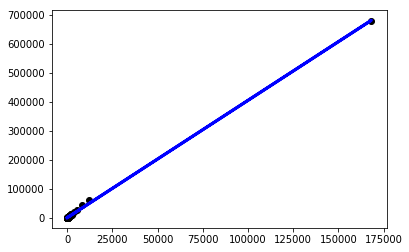

In [19]:
plt.scatter(X, df['Property Crime5'], color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()

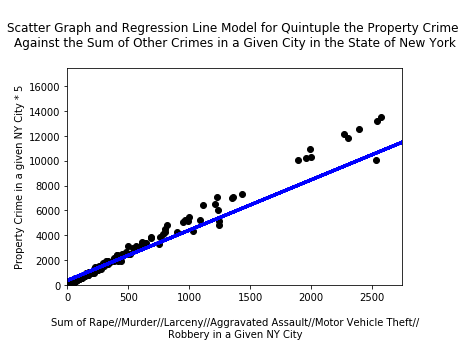

Total Crime does NOT include Arson - weak correlation between that and Property Crime
Total Crime does NOT include Rape as that Data was incomplete.


In [20]:
# Do same thing but zoomed in and with labels

plt.scatter(X, df['Property Crime5'], color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)

plt.xlim(0, 2750)
plt.ylim(0, 17500)

plt.title('''
Scatter Graph and Regression Line Model for Quintuple the Property Crime 
Against the Sum of Other Crimes in a Given City in the State of New York
''')
plt.xlabel('''
Sum of Rape//Murder//Larceny//Aggravated Assault//Motor Vehicle Theft//
Robbery in a Given NY City
''')
plt.ylabel('Property Crime in a given NY City * 5')


plt.show()

print('Total Crime does NOT include Arson - weak correlation between that and Property Crime')
print('Total Crime does NOT include Rape as that Data was incomplete.')

In [21]:
# as a penultimate final touch
import statsmodels.api as sm

In [22]:
results = sm.OLS(Y, sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.279e+05
Date:                Sat, 26 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:07:09   Log-Likelihood:                -3103.7
No. Observations:                 371   AIC:                             6211.
Df Residuals:                     369   BIC:                             6219.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        369.8199     54.343      6.805      0.000     262.958     476.681
x1             4.0452      0.006    654.131      0.000       4.033       4.057
==============================================================================
Omnibus:                      551.283   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92143.936
Skew:                           7.761   Prob(JB):                         0.00
Kurtosis:                      78.630   Cond. No.                     8.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I am going to take this cleaned data and apply it to the model used in 4.4. Should be bueno.

In [23]:
df.to_csv('C:/Users/jafon/Documents/PythonMaterials/Data/NYC-2014-Cleaned.csv')

In [63]:
# go to cross validation technique notes and work from there

# Note - using cross validation for model of PREVIOUS exercise

from sklearn.model_selection import cross_val_score


In [ ]:
cross_val_score(regr, data, target, cv=10)